In [2]:
import numpy as np
import joblib ### para cargar array

########Paquetes para NN #########
import tensorflow as tf
from sklearn import metrics ### para analizar modelo
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  ### para analizar modelo
import pandas as pd

from sklearn.svm import SVC



In [3]:
x_train = joblib.load('salidas\\x_train.pkl')
y_train = joblib.load('salidas\\y_train.pkl')
x_test = joblib.load('salidas\\x_test.pkl')
y_test = joblib.load('salidas\\y_test.pkl')


Modelo Random 

In [5]:
x_test.shape

(1737, 100, 100, 3)

In [6]:
x_train2=x_train.reshape(6953,30000)
x_test2=x_test.reshape(1737, 30000)
x_train2.shape
x_test2.shape

(1737, 30000)

In [7]:
rf=RandomForestClassifier()
rf.fit(x_train2, y_train)

pred_train=rf.predict(x_train2)
print(metrics.classification_report(y_train, pred_train))
metrics.roc_auc_score(y_train, pred_train)

pred_test=rf.predict(x_test2)
print(metrics.classification_report(y_test, pred_test))
metrics.roc_auc_score(y_test, pred_test)

c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2864
           1       1.00      1.00      1.00      4089

    accuracy                           1.00      6953
   macro avg       1.00      1.00      1.00      6953
weighted avg       1.00      1.00      1.00      6953

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       716
           1       0.99      0.99      0.99      1021

    accuracy                           0.99      1737
   macro avg       0.99      0.99      0.99      1737
weighted avg       0.99      0.99      0.99      1737



0.9864418441773045

### Support vector machine

In [8]:
""" gbc=GradientBoostingClassifier()
gbc.fit(x_train2, y_train)

pred_train=gbc.predict(x_train2)
print(metrics.classification_report(y_train, pred_train))
metrics.roc_auc_score(y_train, pred_train)

pred_test=gbc.predict(x_test2)
print(metrics.classification_report(y_test, pred_test))
metrics.roc_auc_score(y_test, pred_test) """

c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## modelo Red neuronal

In [4]:
fc_model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
##### configura el optimizador y la función para optimizar ##############
fc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Recall', 'Precision'])


In [6]:
#####Entrenar el modelo usando el optimizador y arquitectura definidas #########
fc_model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - AUC: 0.7304 - Precision: 0.7369 - Recall: 0.6593 - accuracy: 0.6721 - loss: 0.9022 - val_AUC: 0.9476 - val_Precision: 0.9251 - val_Recall: 0.9432 - val_accuracy: 0.9217 - val_loss: 0.2972
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - AUC: 0.9556 - Precision: 0.9297 - Recall: 0.9255 - accuracy: 0.9144 - loss: 0.2872 - val_AUC: 0.9687 - val_Precision: 0.9366 - val_Recall: 0.9696 - val_accuracy: 0.9436 - val_loss: 0.2194
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - AUC: 0.9731 - Precision: 0.9467 - Recall: 0.9471 - accuracy: 0.9389 - loss: 0.2095 - val_AUC: 0.9758 - val_Precision: 0.9185 - val_Recall: 0.9824 - val_accuracy: 0.9384 - val_loss: 0.2165
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - AUC: 0.9809 - Precision: 0.9515 - Recall: 0.9619 - accuracy: 0.9489 - loss: 0.1718 - val_AUC: 0.9845 - val_Precision: 0.9767 - val_Recall: 0.9452 - val_accuracy: 0.9545 - val_loss: 0.1602
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━

In [7]:
#########Evaluar el modelo ####################
test_loss, test_acc, test_auc, test_recall, test_precision = fc_model.evaluate(x_test, y_test, verbose=2)
print("Test auc:", test_auc)

55/55 - 0s - 6ms/step - AUC: 0.9906 - Precision: 0.9802 - Recall: 0.9687 - accuracy: 0.9701 - loss: 0.1154
Test auc: 0.9905893206596375


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       716
           1       0.98      0.97      0.97      1021

    accuracy                           0.97      1737
   macro avg       0.97      0.97      0.97      1737
weighted avg       0.97      0.97      0.97      1737



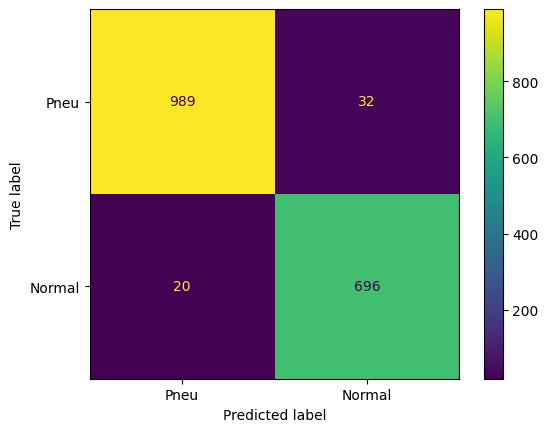

In [8]:
###### matriz de confusión test
pred_test=(fc_model.predict(x_test) > 0.50).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Pneu', 'Normal'])
disp.plot()

print(metrics.classification_report(y_test, pred_test))


### modelos convolusionales

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [ ]:
# Train the model for 10 epochs
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 259ms/step - AUC: 0.8099 - loss: 0.4828 - val_AUC: 0.9861 - val_loss: 0.1470
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - AUC: 0.9833 - loss: 0.1573 - val_AUC: 0.9921 - val_loss: 0.1072
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - AUC: 0.9946 - loss: 0.0900 - val_AUC: 0.9933 - val_loss: 0.0912
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - AUC: 0.9952 - loss: 0.0749 - val_AUC: 0.9947 - val_loss: 0.0774
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - AUC: 0.9978 - loss: 0.0472 - val_AUC: 0.9939 - val_loss: 0.0720
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - AUC: 0.9991 - loss: 0.0351 - val_AUC: 0.9948 - val_loss: 0.0611
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - AUC: 0.9994 - loss: 0.0196 - val_AUC: 0.9944 - val_loss: 0.0551
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - AUC: 1.0000 - loss: 0.0104 - val_AUC: 0.9938 - val_loss: 0.0563
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/